
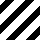
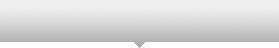
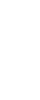
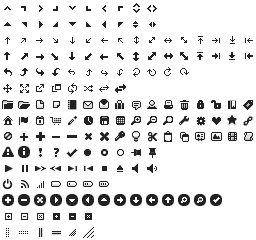
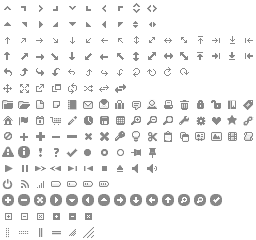
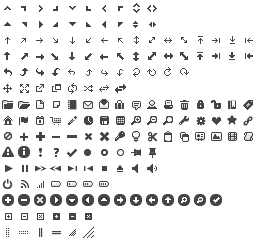
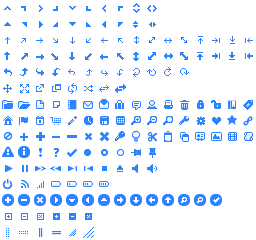
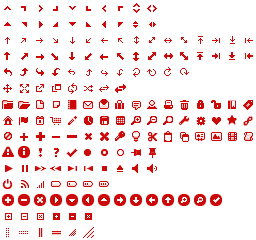
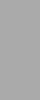
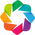
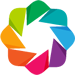
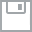
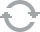
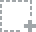
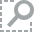
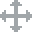
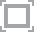
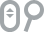

In [1]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from bokeh.plotting import figure,show,output_notebook
from bokeh.models import Range1d

from sklearn import datasets
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

output_notebook()
%matplotlib inline

Question 1: A projectile fired upwards from the ground

In [12]:
time = np.array([0, .5, 1, 1.5, 2, 2.5])
height = np.array([0, 20.5, 31.6, 36.25, 30.41, 28.23])

df_projectile = pd.DataFrame(time, columns=['time'])
df_projectile['height'] = height
df_projectile

,time,height
0,0.0,0.00
1,0.5,20.50
2,1.0,31.60
3,1.5,36.25
4,2.0,30.41
5,2.5,28.23


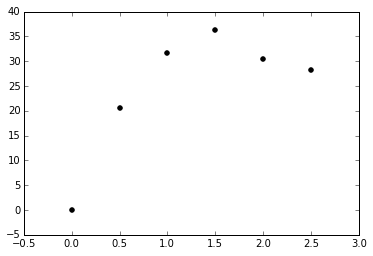

In [13]:
plt.scatter(time, height, color="black")

In [23]:
import statsmodels.api as sm
x = time
X = np.c_[x**2, x, np.ones(len(x))]
res = sm.OLS(height, X).fit()

p = figure(title='Blue = True; Red = OLS')
p.circle(time, height, size=8,color='blue')

xx = np.linspace(0,3.5,100)
p.line(xx, res.predict(np.vander(xx,3)), color='red')
show(p)

In [16]:
res.summary()

C:\Users\CVH0\AppData\Local\Continuum\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     54.88
Date:                Sun, 22 Nov 2015   Prob (F-statistic):            0.00434
Time:                        18:13:17   Log-Likelihood:                -12.506
No. Observations:                   6   AIC:                             31.01
Df Residuals:                       3   BIC:                             30.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           -12.9400      1.801     -7.184      0.006       -18.672    -7.208
x2            42.3803      4.691      9.035      0.003        27.452    57.309
const          1.1771      2.494      0.472      0.669        -6.758     9.113
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.598
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.016
Skew:                          -0.988   Prob(JB):                        0.602
Kurtosis:                       2.598   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The projectile will hit the ground around 3.3 seconds

In [27]:
# Solve the quadratic equation ax**2 + bx + c = 0
# Coeffients a, b and c are provided by the user

# import complex math module
import cmath

a = res.params[0]
b = res.params[1]
c = res.params[2]

# calculate the discriminant
d = (b**2) - (4*a*c)

# find two solutions
sol1 = (-b-cmath.sqrt(d))/(2*a)
sol2 = (-b+cmath.sqrt(d))/(2*a)

print('The solution are {0} and {1}'.format(sol1,sol2))

The solution are (3.3026820704+0j) and (-0.0275440708367-0j)


Question 2: Healthcare costs

In [29]:
x = np.array([1976, 1980, 1987, 1993, 1998])
y = np.array([618, 860, 1324, 1865, 2256])

df_health = pd.DataFrame(x, columns=['year'])
df_health['cost'] = y
df_health

,year,cost
0,1976,618
1,1980,860
2,1987,1324
3,1993,1865
4,1998,2256


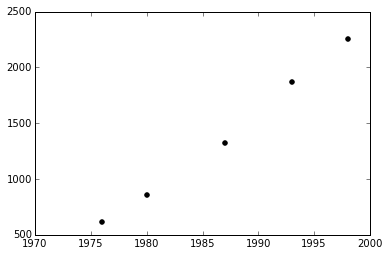

In [30]:
plt.scatter(x, y, color="black")

In [31]:
x = df_health['year'].values
y = df_health['cost'].values

X = sm.add_constant(x, prepend=True)
results = sm.OLS(y, X).fit()
intercept, slope = results.params

r2 = results.rsquared

p = figure(title='Cost vs Year')
p.circle(x,y,color="blue",size=8)

x1 = range(min(x),max(x)+1)

# For loop:
y1 = []
for val in x1:
    y1.append(intercept + slope*val)
    
# This generates y1 again, but with one line of code instead
# List Comprehension:
y1 = [intercept + slope*val for val in x1]

p.line(x1,y1,color='red')

show(p)

In [32]:
(2800 - intercept) / slope

2005.6239225804359

Question 3: X Y Dataset

In [34]:
x = np.array([-1, 0, 1, 2, 3, 5, 7, 9])
y = np.array([-1, 3, 2.5, 5, 4, 2, 5, 5])

df = pd.DataFrame(x, columns=['X'])
df['Y'] = y
df

,X,Y
0,-1,-1.0
1,0,3.0
2,1,2.5
3,2,5.0
4,3,4.0
5,5,2.0
6,7,5.0
7,9,5.0


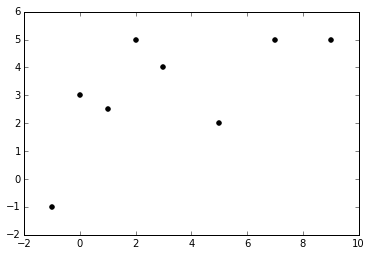

In [35]:
plt.scatter(x, y, color="black")

In [39]:
X = np.c_[x**3, x**2, x, np.ones(len(x))]
res = sm.OLS(y, X).fit()

p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(min(x),max(x),100)
p.line(xx, res.predict(np.vander(xx,4)), color='red')
show(p)

In [45]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = .1)
ridge.fit(np.vander(x, 4), y)

ridge2 = Ridge(alpha = 4)
ridge2.fit(np.vander(x, 4), y)

lasso = Lasso(alpha = 3)
lasso.fit(np.vander(x, 4), y)

## lasso is L1 and ridge is L2

p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(min(x),max(x),100)
p.line(xx, res.predict(np.vander(xx,4)), color='red')
p.line(xx, ridge.predict(np.vander(xx,4)), color='green')
p.line(xx, lasso.predict(np.vander(xx,4)), color='cyan')
p.line(xx, ridge2.predict(np.vander(xx,4)), color = 'black')
show(p)





I choose the black line - ridge regression

Question 4 & 5 - Red Wine

In [49]:
data = pd.read_csv("C:\Users\CVH0\Documents\Data Science\DAT_SF_18\homework\winequality-red.csv", sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


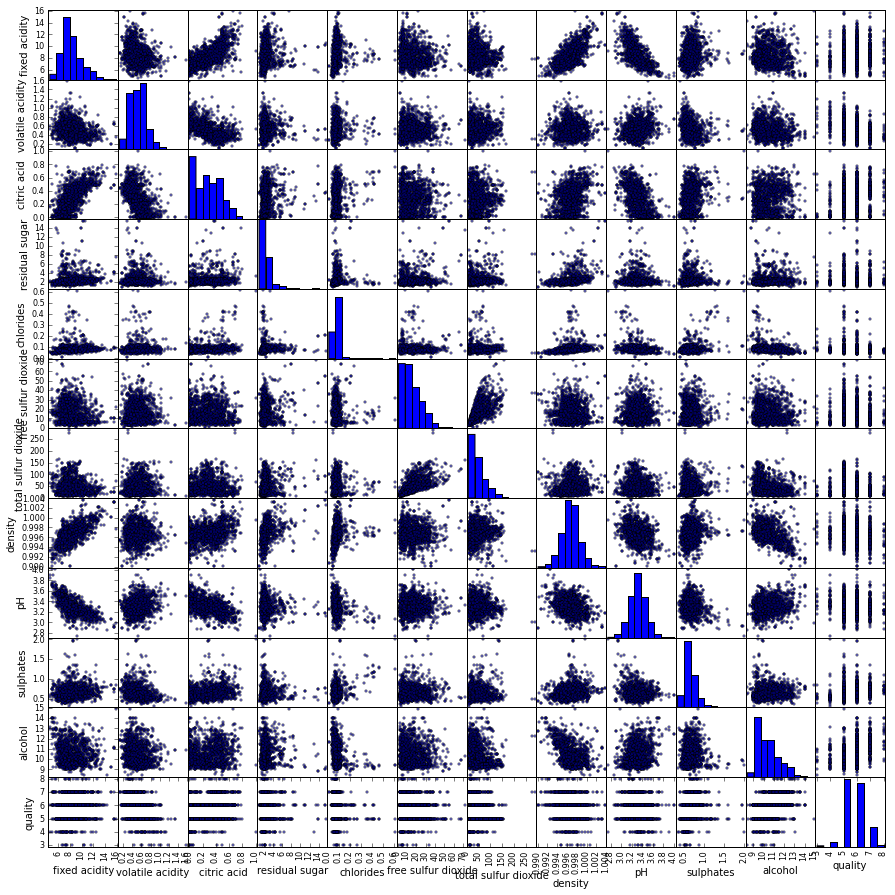

In [51]:
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(data, figsize = (15,15))

a. There seem to be relationships between:
    citric acid + fixed acidity
    citic acid + volatile acidity
    citric acid + pH
    fixed acidity + pH
    fixed acidity + density
b. The most commmon quality score is 5 but varies from 3 to 8. The average score is 5.6. It seems like there might be a small relationship between quality and volatile acidity as well as between quality and alcohol.
c. 12 features - they are not normalized

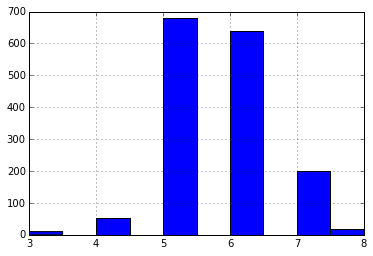

In [52]:
data['quality'].hist()

In [58]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [76]:
scaler = StandardScaler()
wine_norm = scaler.fit_transform(data)

data_norm = pd.DataFrame(wine_norm, columns=data.columns)

Question 6 - OLS Regression

In [77]:
x = data_norm.ix[:,:-1].values
#sm.add_constant adds a column of ones to allow for finding an intercept to your data.
X = sm.add_constant(x, prepend=True)
y = data_norm['quality'].values

results = sm.OLS(y, X).fit()


results.summary()

#R2 is not very good

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sun, 22 Nov 2015   Prob (F-statistic):          1.79e-145
Time:                        20:15:14   Log-Likelihood:                -1911.4
No. Observations:                1599   AIC:                             3847.
Df Residuals:                    1587   BIC:                             3911.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.273e-15      0.020   6.34e-14      1.000        -0.039     0.039
x1             0.0539      0.056      0.963      0.336        -0.056     0.164
x2            -0.2403      0.027     -8.948      0.000        -0.293    -0.188
x3            -0.0440      0.036     -1.240      0.215        -0.114     0.026
x4             0.0285      0.026      1.089      0.276        -0.023     0.080
x5            -0.1092      0.024     -4.470      0.000        -0.157    -0.061
x6             0.0565      0.028      2.009      0.045         0.001     0.112
x7            -0.1330      0.030     -4.480      0.000        -0.191    -0.075
x8            -0.0418      0.051     -0.827      0.409        -0.141     0.057
x9            -0.0791      0.037     -2.159      0.031        -0.151    -0.007
x10            0.1923      0.024      8.014      0.000         0.145     0.239
x11            0.3645      0.035     10.429      0.000         0.296     0.433
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                         7.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
from sklearn.linear_model import LogisticRegression

features = data.drop('quality',axis=1)
target = data.quality
model_lr = LogisticRegression()

cross_val_score(model_lr,features,target,cv=5).mean()

## No regularization. not very good

0.57234966624109229

In [85]:

features = data.drop('quality',axis=1)
target = data.quality
model_lr = LogisticRegression(C=500)

cross_val_score(model_lr,features,target,cv=5).mean()

##C= 500. not very good

0.57734591980187822

In [87]:
features = data.drop('quality',axis=1)
target = data.quality
model_lr = LogisticRegression(C=1)

cross_val_score(model_lr,features,target,cv=5).mean()

## C = 1 not very good

0.57234966624109229

In [89]:
##I'm limiting to only those features that seemed related
features=['volatile acidity','alcohol']
data_features = data[features]
target = data.quality
model_lr = LogisticRegression()

cross_val_score(model_lr,data_features,target,cv=5).mean()

##EVEN WORSE!

0.55857559141986857

In [90]:
features = data_norm.drop('quality',axis=1)
target = data.quality
model_lr = LogisticRegression(C=1)

cross_val_score(model_lr,features,target,cv=5).mean()

##Used the normalized data to predict non-normalized output, slightly better.

0.57923665631742338

In [94]:
x = data_norm.ix[:,:-1].values
#sm.add_constant adds a column of ones to allow for finding an intercept to your data.
#X = sm.add_constant(x, prepend=True)
y = data['quality'].values

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
#Split our data
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=1)


sk_lrn_model = LinearRegression()
sk_lrn_model.fit(X_train, y_train)


print "Sklearn Model:"
print "Intercept : {}".format(sk_lrn_model.intercept_)
print 'Coefficients: {}'.format(sk_lrn_model.coef_)
# The mean square error
print("Residual sum of squares (Train): {0:.3f}".format(np.mean((sk_lrn_model.predict(X_train) - y_train) ** 2)))
print("Residual sum of squares (Test): {0:.3f}".format(np.mean((sk_lrn_model.predict(X_test) - y_test) ** 2)))

# Explained variance score: 1 is perfect prediction
print('Variance score: {0:.3f}'.format(sk_lrn_model.score(X_test, y_test)))

Sklearn Model:
Intercept : 5.64455123853
Coefficients: [ 0.07259391 -0.20884172 -0.04995238  0.02534502 -0.08411056  0.05153578
 -0.11680133 -0.06689119 -0.05942308  0.14974917  0.28111929]
Residual sum of squares (Train): 0.428
Residual sum of squares (Test): 0.387
Variance score: 0.344
